In [2]:
!pip install rdkit==2023.9.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.1 MB/s eta 0:00:00


In [3]:
import rdkit
from rdkit import Chem, RDLogger
from rdkit.Chem import Draw, AllChem, PandasTools, BRICS, MACCSkeys, Descriptors
from rdkit.Chem.Draw import rdMolDraw2D, SimilarityMaps
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity, DiceSimilarity
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors3D
import warnings


import pandas as pd
import numpy as np
from collections import Counter

warnings.filterwarnings("ignore")
RDLogger.DisableLog('rdApp.*')


In [16]:
# read excel files using pandas
df = pd.read_excel('nitrogencompounds.xlsx')

In [5]:
df.head()

,Name,Smiles
0,1-formylpiperidine,O=CN1CCCCC1
1,"N,N-diethylformamide",O=CN(CC)CC
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O
3,pyrrolidin-2-one,O=C1CCCN1
4,N-methylpropionamide,CNC(CC)=O


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    50 non-null     object
 1   Smiles  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes


# **Reading, Drawing, and Writing Molecules**

**Reading SMILES**

In [7]:
# for a single SMILES string

mol = Chem.MolFromSmiles('O=CN1CCCCC1')

In [8]:
print(mol)

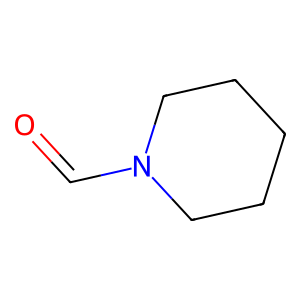

In [9]:
img = Draw.MolToImage(mol)
img

In [10]:
Draw.MolToFile(mol,'mol.png')

In [ ]:
# generate molecular objects for the whole dataset

In [11]:
df.head()

,Name,Smiles
0,1-formylpiperidine,O=CN1CCCCC1
1,"N,N-diethylformamide",O=CN(CC)CC
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O
3,pyrrolidin-2-one,O=C1CCCN1
4,N-methylpropionamide,CNC(CC)=O


In [17]:
mol_list = []

for smile in df['Smiles']:
  mol = Chem.MolFromSmiles(smile)
  mol = Chem.AddHs(mol)
  mol_list.append(mol)

df = pd.concat([df, pd.DataFrame(mol_list, columns=(['Mol']))], axis=1)

In [18]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7ff9460>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7ff9d20>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7ff90e0>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7ff9e00>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7ff9e70>


In [19]:
# creating images from molecular objects
img=Draw.MolsToGridImage(df['Mol'][:16],
                         molsPerRow=4,
                         subImgSize=(400,400),
                         legends=[x for x in df['Name'][:16]],
                         )


open('image.png', 'wb').write(img.data)

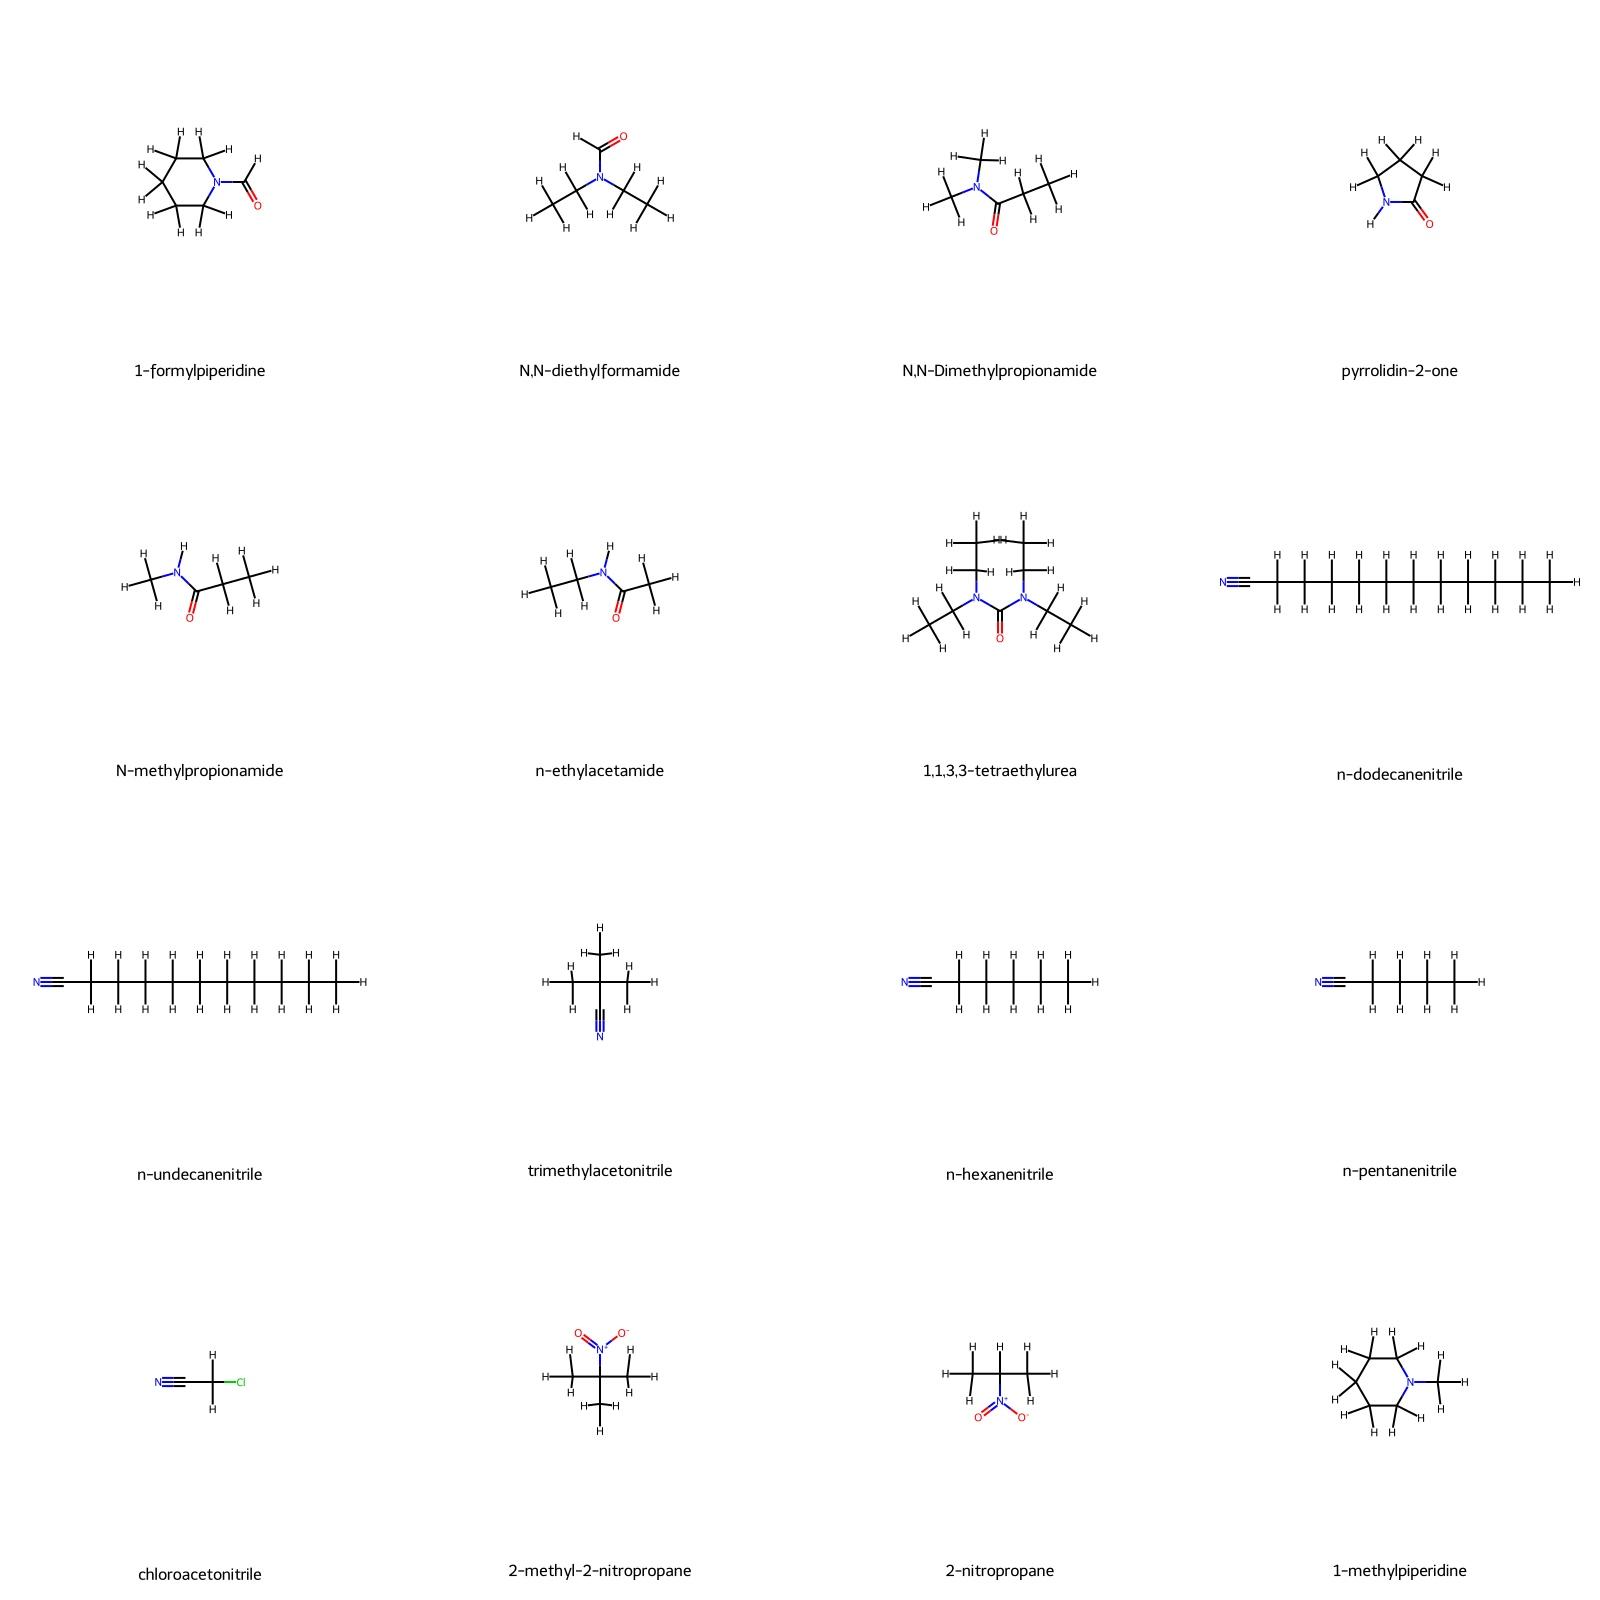

In [20]:
img

In [21]:
# create molecular objects using rdkit.Chem.PandasTools module
PandasTools.AddMoleculeColumnToFrame(df, 'Smiles', 'Mol')

In [22]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20740>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d207b0>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20660>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20820>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d205f0>


In [23]:
# creating images from molecular objects
img=Draw.MolsToGridImage(df['Mol'][:16],
                         molsPerRow=4,
                         subImgSize=(200,200),
                         legends=[x for x in df['Name'][:16]]
                         )



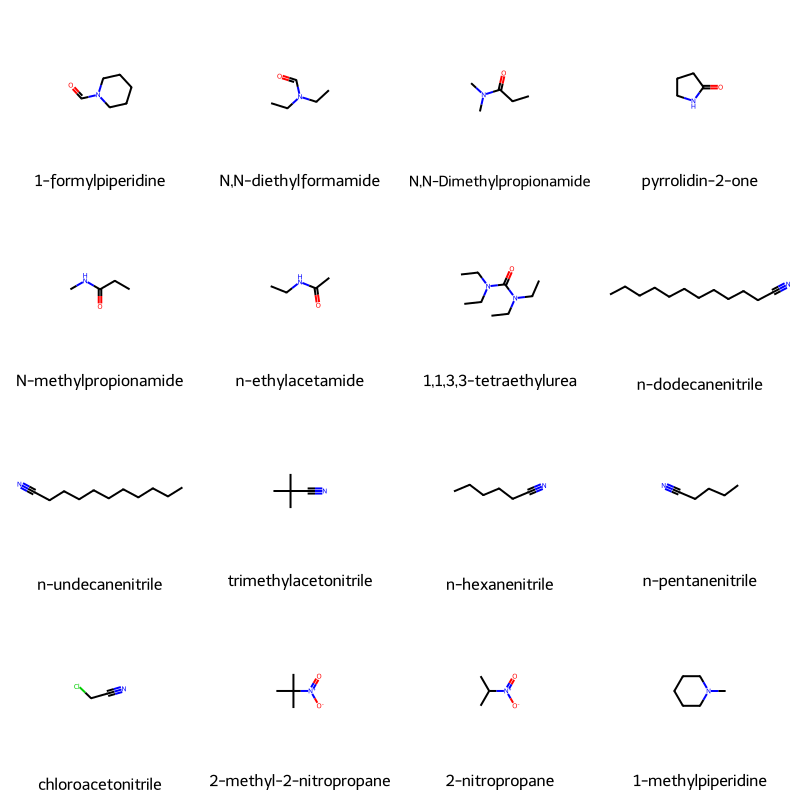

In [24]:
img

**Reading .sdf files**

In [25]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20740>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d207b0>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20660>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20820>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d205f0>


In [26]:
SDF = PandasTools.LoadSDF('sample.sdf',
                            smilesName='SMILES',
                            molColName='Molecule',
                            )

,PUBCHEM_COMPOUND_CID,PUBCHEM_COMPOUND_CANONICALIZED,PUBCHEM_CACTVS_COMPLEXITY,PUBCHEM_CACTVS_HBOND_ACCEPTOR,PUBCHEM_CACTVS_HBOND_DONOR,PUBCHEM_CACTVS_ROTATABLE_BOND,PUBCHEM_CACTVS_SUBSKEYS,PUBCHEM_IUPAC_OPENEYE_NAME,PUBCHEM_IUPAC_CAS_NAME,PUBCHEM_IUPAC_NAME_MARKUP,...,PUBCHEM_ATOM_UDEF_STEREO_COUNT,PUBCHEM_BOND_DEF_STEREO_COUNT,PUBCHEM_BOND_UDEF_STEREO_COUNT,PUBCHEM_ISOTOPIC_ATOM_COUNT,PUBCHEM_COMPONENT_COUNT,PUBCHEM_CACTVS_TAUTO_COUNT,PUBCHEM_COORDINATE_TYPE,ID,SMILES,Molecule
0,12965,1,68.5,1,0,1,AAADccBiIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...,"N,N-dimethylpropanamide","N,N-dimethylpropanamide","<I>N</I>,<I>N</I>-dimethylpropanamide",...,0,0,0,0,1,-1,1\n5\n255,12965,CCC(=O)N(C)C,

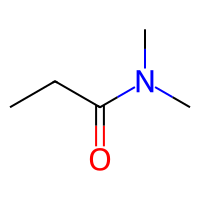

In [27]:
SDF

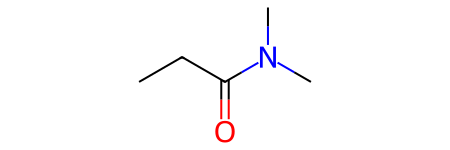

In [28]:
mol = SDF['Molecule'][0]
mol

**Reading sets of molecules**

> Groups of molecules in .sdf files are read using a Supplier




In [29]:
!wget https://github.com/rdkit/rdkit-tutorials/raw/master/data/approved_drugs.sdf

--2024-01-19 17:32:36--  https://github.com/rdkit/rdkit-tutorials/raw/master/data/approved_drugs.sdf
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdkit/rdkit-tutorials/master/data/approved_drugs.sdf [following]
--2024-01-19 17:32:37--  https://raw.githubusercontent.com/rdkit/rdkit-tutorials/master/data/approved_drugs.sdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4085032 (3.9M) [text/plain]
Saving to: ‘approved_drugs.sdf’

approved_drugs.sdf  100%[===================>]   3.90M  --.-KB/s    in 0.08s   

2024-01-19 17:32:37 (51.1 MB/s) - ‘approved_drugs.sdf’ saved [4085032/4085032]



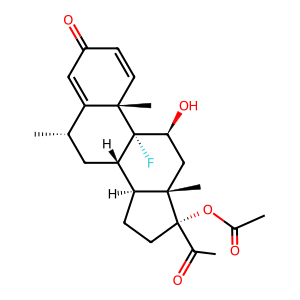

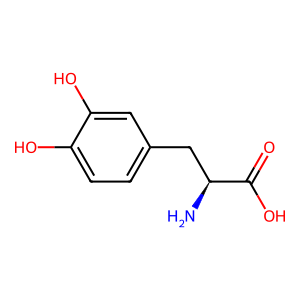

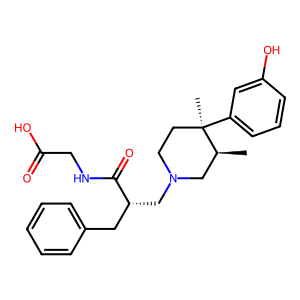

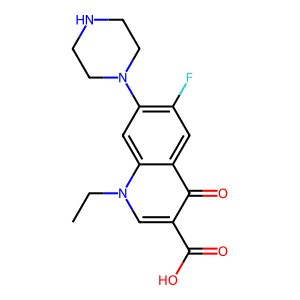

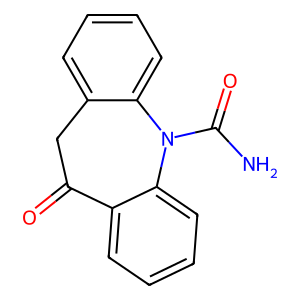

In [33]:
sdmol = Chem.SDMolSupplier('approved_drugs.sdf')
for mol in list(sdmol)[:5]:
  img = Draw.MolToImage(mol)
  display(img)

In [34]:
len(sdmol)

1284

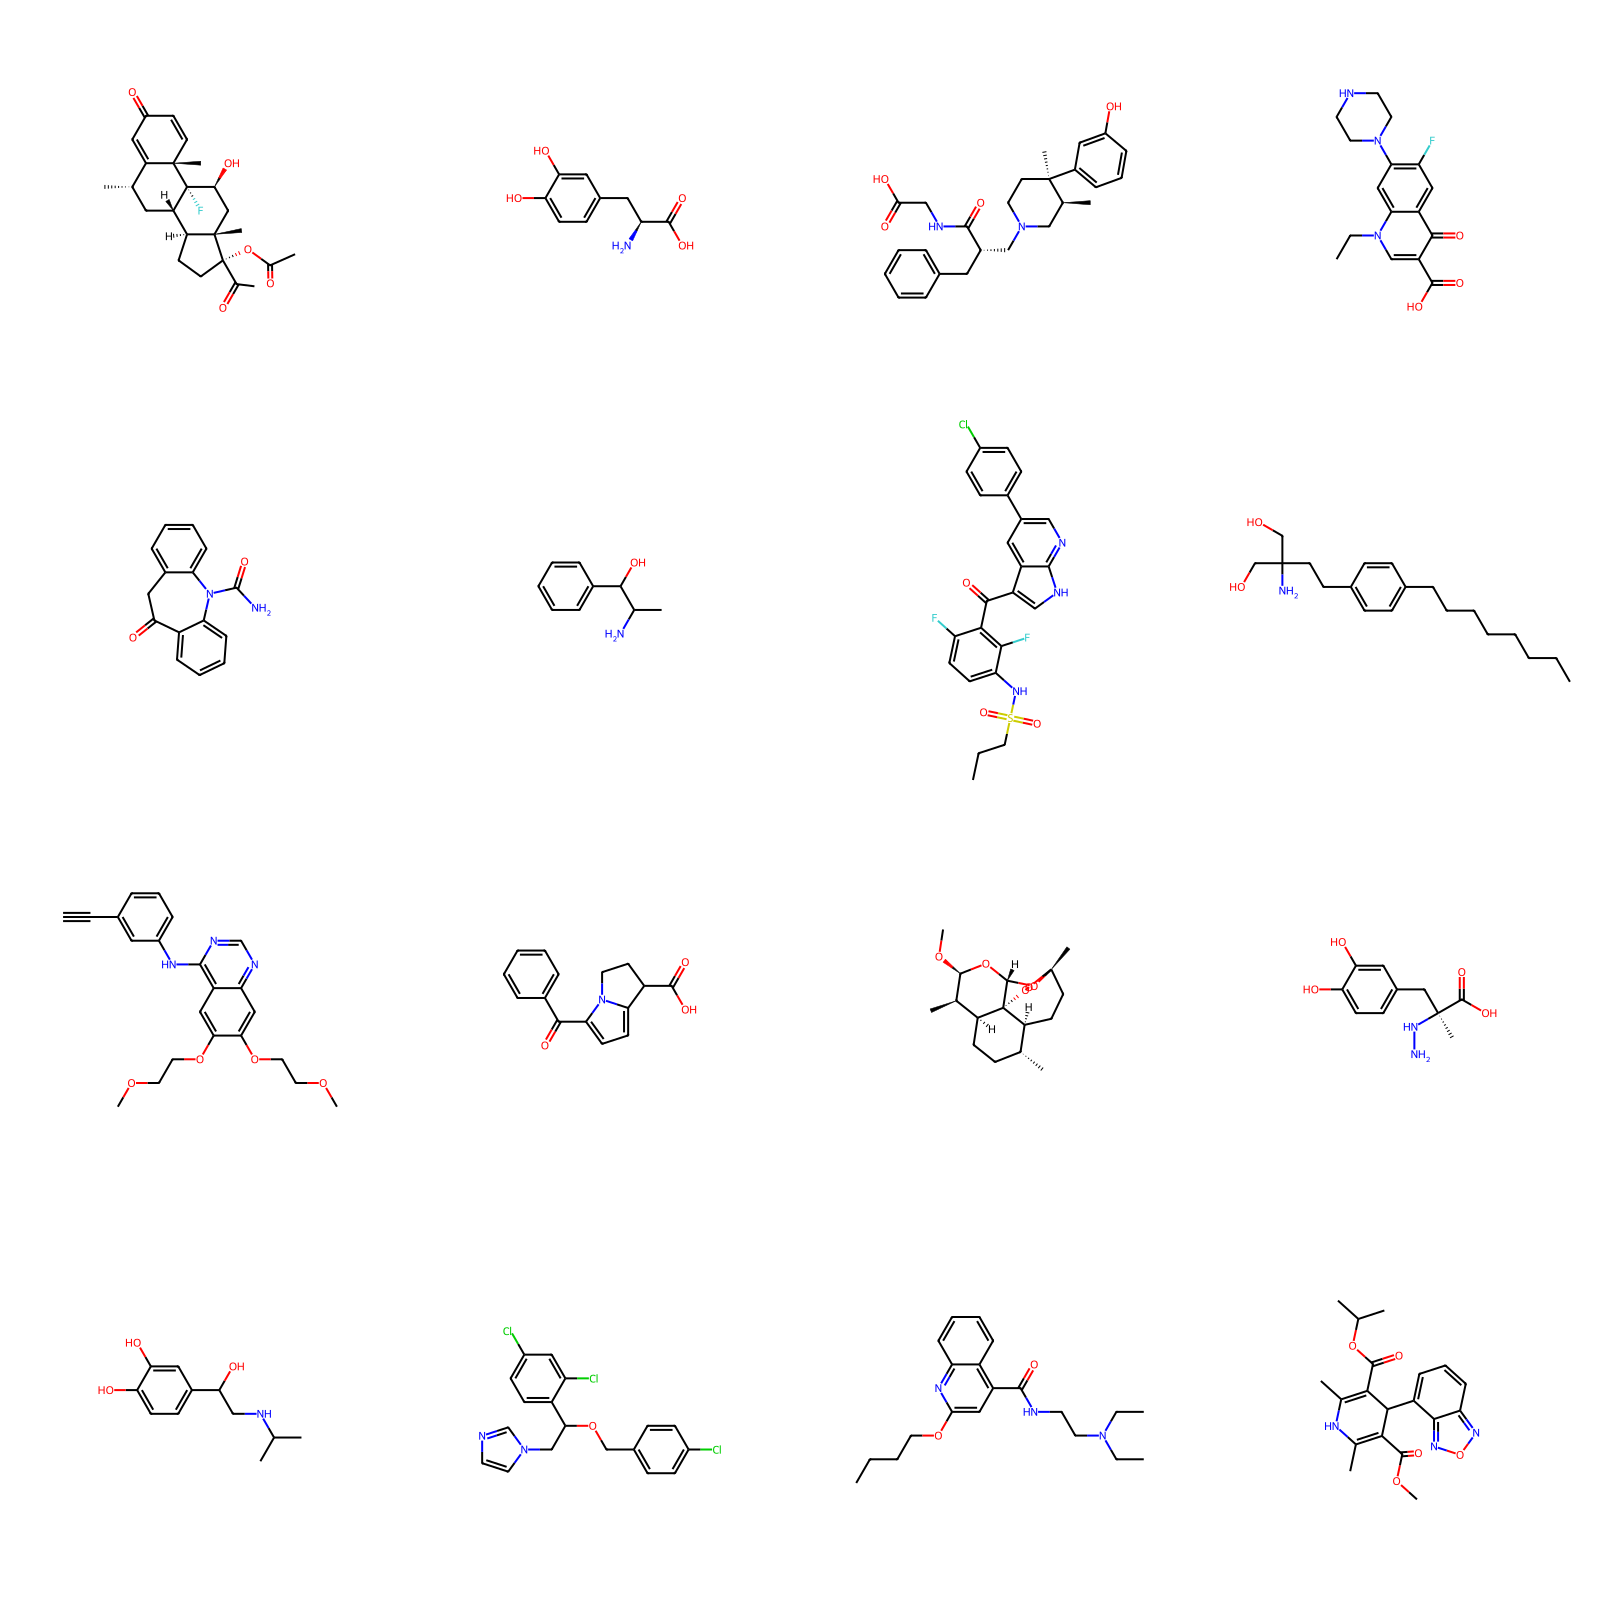

In [35]:
img=Draw.MolsToGridImage(list(sdmol)[:16],
                         molsPerRow=4,
                         subImgSize=(400,400),
                         )
img

 **Writing Molecule**

In [36]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20740>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d207b0>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20660>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20820>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d205f0>


In [37]:
mol_0 = df['Mol'][0]

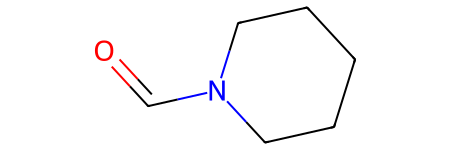

In [38]:
mol_0

In [39]:
Chem.MolToSmiles(mol_0)

'O=CN1CCCCC1'

In [40]:
sdmol = Chem.SDMolSupplier('approved_drugs.sdf')
drugs_smiles = []
for mol in sdmol:
  smile = Chem.MolToSmiles(mol)
  drugs_smiles.append(smile)

drugs_smiles[:10]


['CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C[C@H](C)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
 'N[C@@H](Cc1ccc(O)c(O)c1)C(=O)O',
 'C[C@H]1CN(C[C@H](Cc2ccccc2)C(=O)NCC(=O)O)CC[C@@]1(C)c1cccc(O)c1',
 'CCn1cc(C(=O)O)c(=O)c2cc(F)c(N3CCNCC3)cc21',
 'NC(=O)N1c2ccccc2CC(=O)c2ccccc21',
 'CC(N)C(O)c1ccccc1',
 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(-c4ccc(Cl)cc4)cc23)c1F',
 'CCCCCCCCc1ccc(CCC(N)(CO)CO)cc1',
 'C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1',
 'O=C(c1ccccc1)c1ccc2n1CCC2C(=O)O']

# **Generating 2D and 3D Geometries**

In [41]:
df.head()

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20740>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d207b0>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20660>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20820>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d205f0>


In [42]:
m = Chem.MolFromSmiles('CN(C)C(CC)=O')
m.SetProp("_Name","mol-2d")
AllChem.Compute2DCoords(m)

0

In [43]:
print(Chem.MolToMolBlock(m))

mol-2d
     RDKit          2D

  7  6  0  0  0  0  0  0  0  0999 V2000
   -2.2837    0.8417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1803   -0.1745    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5086   -1.6381    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.2514    0.2730    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3548   -0.7431    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.7865   -0.2956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5797    1.7367    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  1  0
  5  6  1  0
  4  7  2  0
M  END



In [44]:
print(Chem.MolToMolBlock(m),file=open('mol-2d.sdf','w+'))

In [45]:
m = Chem.MolFromSmiles('CN(C)C(CC)=O')
m.SetProp("_Name","mol-3d")
m2 = Chem.AddHs(m)
AllChem.EmbedMolecule(m2)

0

In [46]:
print(Chem.MolToMolBlock(m2))


mol-3d
     RDKit          3D

 18 17  0  0  0  0  0  0  0  0999 V2000
   -2.2180   -0.4281   -0.7624 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9180   -0.1215   -0.1442 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8755    1.0948    0.6424 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1615   -0.9884   -0.3315 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5192   -0.8360    0.1858 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0412    0.5508    0.3010 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0468   -2.0435   -1.0355 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3616   -1.5197   -0.7610 H   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0550    0.0360   -0.2319 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1706   -0.0188   -1.7885 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9139    1.4877    0.8500 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3546    1.8952    0.1076 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4808    0.8955    1.6770 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2353   -1.407

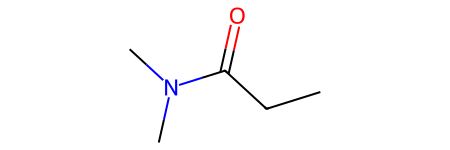

In [47]:
m

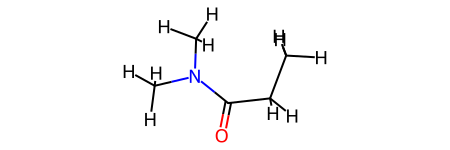

In [48]:
m2

In [49]:
print(Chem.MolToMolBlock(m2),file=open('mol-3d.mol','w+'))

# **Optimizing molecules**

In [51]:
res = AllChem.MMFFOptimizeMoleculeConfs(m2)

In [52]:
res

[(0, -11.761070570397502)]

# **Getting Atom-Centric Properties**

In [53]:
df.tail()

,Name,Smiles,Mol
45,n-cyanomorpholine,N#CN1CCOCC1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d21b60>
46,"1,1,3,3-tetramethyl urea",O=C(N(C)C)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d21bd0>
47,"1,1,3,3-tetramethylguanidine",N=C(N(C)C)N(C)C,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d21c40>
48,dimethylethylurea,O=C(N(C)C)NCC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d21cb0>
49,dimethyl propylene urea,O=C1N(C)CCCN1C,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d21d20>


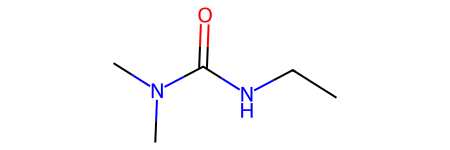

In [54]:
m3 = Chem.MolFromSmiles('O=C(N(C)C)NCC')
m3

In [55]:
atom_list = list(m3.GetAtoms())

In [56]:
print(atom_list)

[<rdkit.Chem.rdchem.Atom object at 0x7bcff58dcd60>, <rdkit.Chem.rdchem.Atom object at 0x7bcff58dcc80>, <rdkit.Chem.rdchem.Atom object at 0x7bcff58dd000>, <rdkit.Chem.rdchem.Atom object at 0x7bcff58dcf90>, <rdkit.Chem.rdchem.Atom object at 0x7bcff58dcdd0>, <rdkit.Chem.rdchem.Atom object at 0x7bcff58dce40>, <rdkit.Chem.rdchem.Atom object at 0x7bcff58dceb0>, <rdkit.Chem.rdchem.Atom object at 0x7bcff58dcf20>]


In [59]:
atom_list[2].GetSymbol()

'N'

In [61]:
m3.GetAtomWithIdx(2).GetSymbol()

'N'

In [62]:
m3.GetAtomWithIdx(2).GetAtomicNum()

7

In [63]:
m3.GetBondBetweenAtoms(0,1).GetBondType()

rdkit.Chem.rdchem.BondType.DOUBLE

In [64]:
for atom in m3.GetAtoms():
  print(atom.GetIdx(),atom.GetSymbol(), atom.GetAtomicNum())


0 O 8
1 C 6
2 N 7
3 C 6
4 C 6
5 N 7
6 C 6
7 C 6


In [65]:
for atom in m3.GetAtoms():
  print(atom.GetIdx(),atom.GetSymbol(), atom.GetHybridization())

0 O SP2
1 C SP2
2 N SP2
3 C SP3
4 C SP3
5 N SP2
6 C SP3
7 C SP3


# **Highlighting Molecules**


> Atoms in a molecule can be highlighted by drawing a coloured solid or open circle around them, and bonds likewise can have a coloured outline applied. An obvious use is to show atoms and bonds that have matched a substructure query







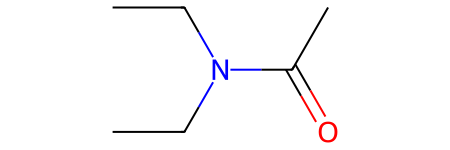

In [66]:
mol = df['Mol'][34]
mol

In [70]:
patt = Chem.MolFromSmarts('NC=O')
hit_ats = list(mol.GetSubstructMatch(patt))
d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats)


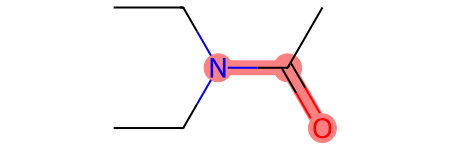

In [71]:
mol

In [72]:
patt = Chem.MolFromSmarts('NC=O')


for mol in df['Mol']:
  hit_ats = list(mol.GetSubstructMatch(patt))
  d = rdMolDraw2D.MolDraw2DSVG(500, 500) # or MolDraw2DCairo to get PNGs
  rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=hit_ats)


,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,
1,"N,N-diethylformamide",O=CN(CC)CC,
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,
3,pyrrolidin-2-one,O=C1CCCN1,
4,N-methylpropionamide,CNC(CC)=O,
5,n-ethylacetamide,CC(NCC)=O,
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,
7,n-dodecanenitrile,CCCCCCCCCCCC#N,
8,n-undecanenitrile,CCCCCCCCCCC#N,
9,trimethylacetonitrile,CC(C)(C)C#N,

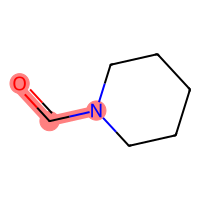
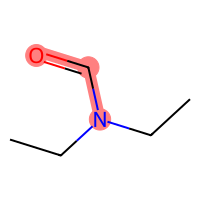
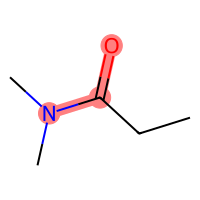
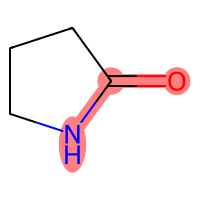
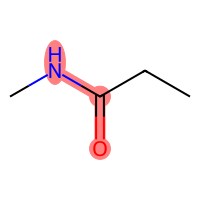
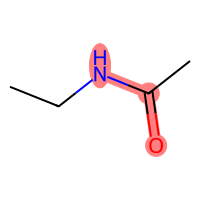
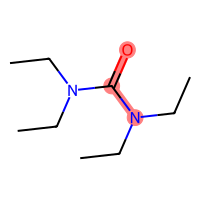
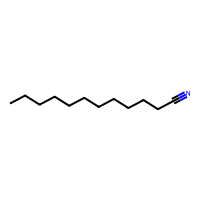
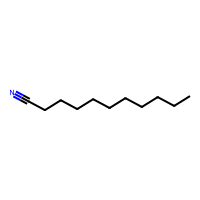
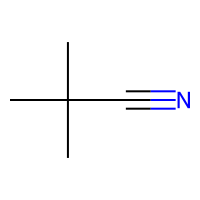
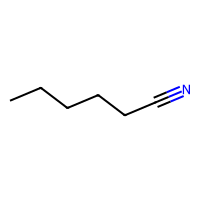
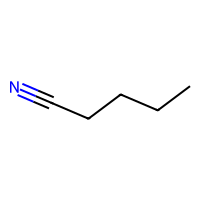
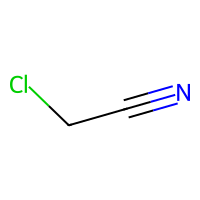
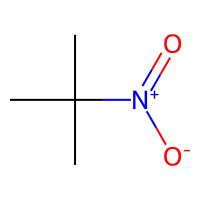
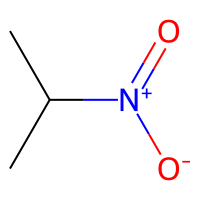
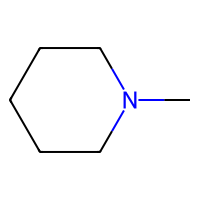
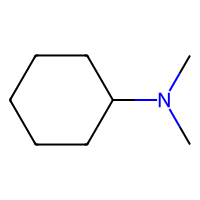
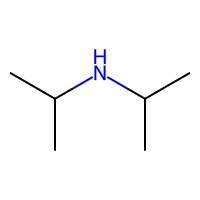
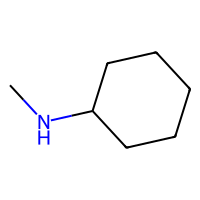
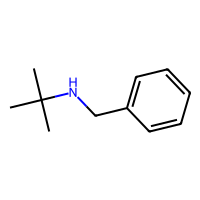
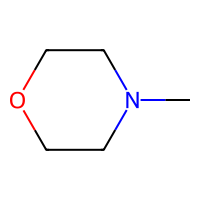
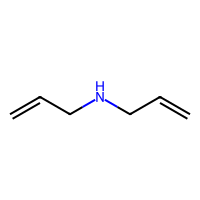
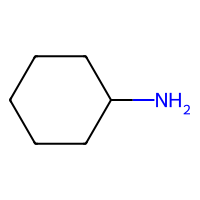
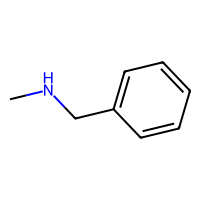
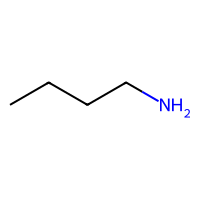
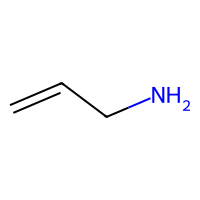
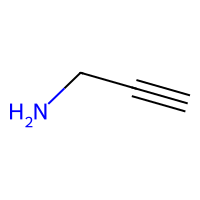
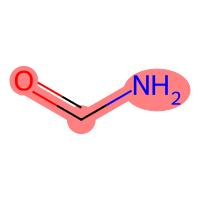
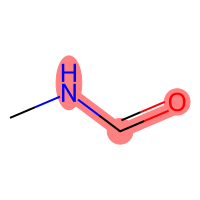
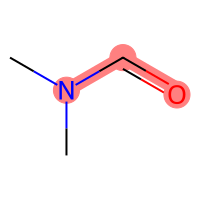
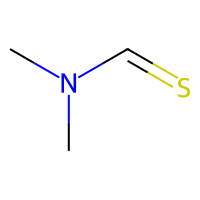
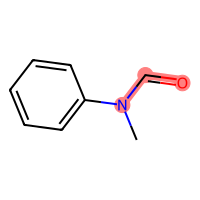
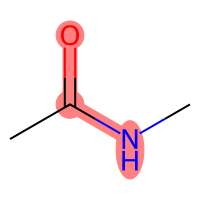
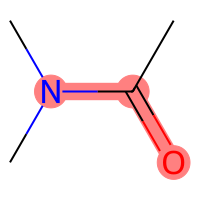
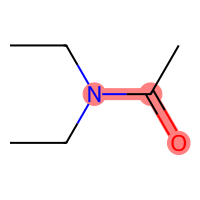
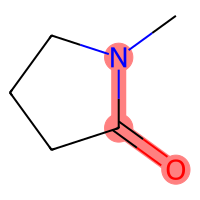
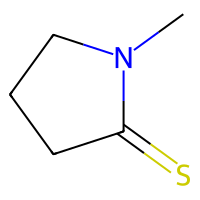
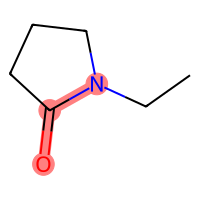
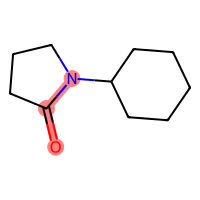
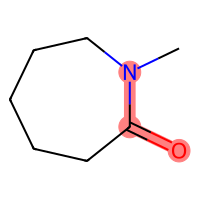
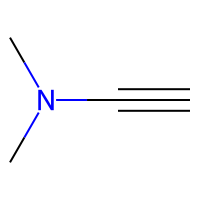
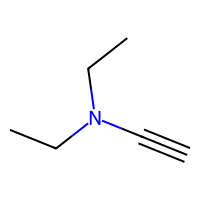
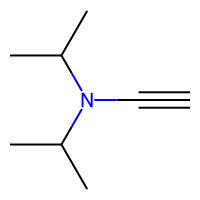
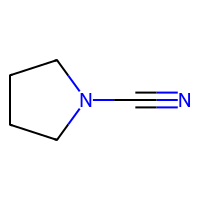
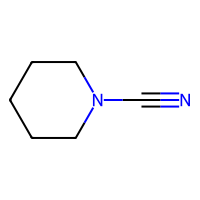
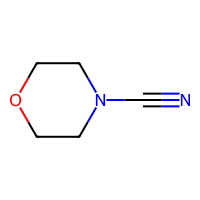
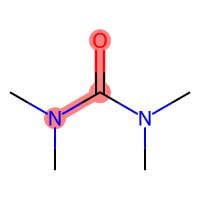
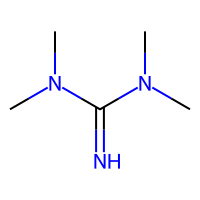
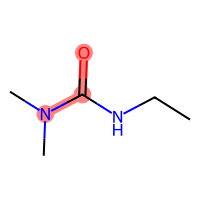
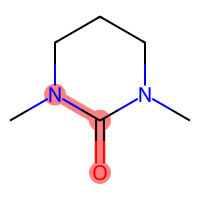

In [73]:
df

# **Substructure Search**

In [74]:
patt = Chem.MolFromSmarts('NC=O')

matches = [mol for mol in df['Mol'] if mol.HasSubstructMatch(patt)]

In [75]:

len(matches)


21

In [76]:
matches

In [77]:
df[df['Mol'].isin(matches)]

,Name,Smiles,Mol
0,1-formylpiperidine,O=CN1CCCCC1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20740>
1,"N,N-diethylformamide",O=CN(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d207b0>
2,"N,N-Dimethylpropionamide",CN(C)C(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20660>
3,pyrrolidin-2-one,O=C1CCCN1,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20820>
4,N-methylpropionamide,CNC(CC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d205f0>
5,n-ethylacetamide,CC(NCC)=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20580>
6,"1,1,3,3-tetraethylurea",O=C(N(CC)CC)N(CC)CC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d20a50>
27,formamide,NC([H])=O,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d21380>
28,N-methylformamide,O=C([H])NC,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d213f0>
29,DMF,O=C([H])N(C)C,<rdkit.Chem.rdchem.Mol object at 0x7bcff7d21460>


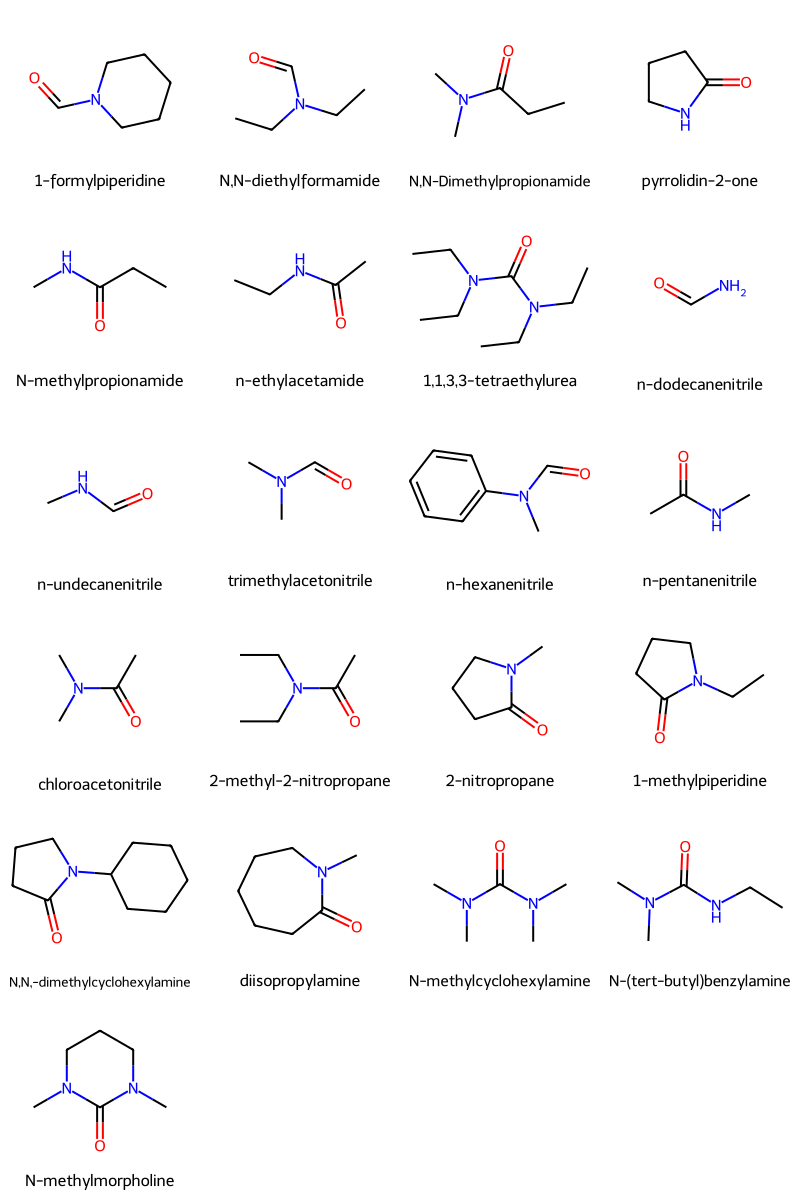

In [78]:
img=Draw.MolsToGridImage(matches,
                         molsPerRow=4,
                         subImgSize=(200,200),
                         legends = [name for name in df['Name']]
                         )
img